## Homework 3

* Generate dataset using `make_classification` function in the sklearn.datasets class. Generate 10000 samples with 8 features (X) with one label (y). Also, use following parameters    
    * `n_informative` = 5
    *  `class_sep` = 2
    * `random_state` = 42
* Explore and analyse raw data.
* Do preprocessing for classification.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
* Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [3]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
from sklearn.metrics import plot_confusion_matrix


In [4]:
# Generate dataset using make_classification function in the sklearn. 
# Convert it into pandas dataframe.
X, y = make_classification(n_samples=10000, n_features=8,n_informative =5,class_sep =2,random_state =42 )
print(X.shape, y.shape)
df = pd.DataFrame(np.c_[X, y])
df.shape
df

(10000, 8) (10000,)


,0,1,2,3,4,5,6,7,8
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344,0.0
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611,1.0
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524,0.0
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934,0.0
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770,0.0
...,...,...,...,...,...,...,...,...,...
9995,-2.399057,2.275687,-0.345061,0.629983,3.397411,-1.502344,3.098817,0.583324,0.0
9996,-1.487918,2.273560,-1.152804,2.062795,-0.571202,-5.398310,-2.426969,2.455303,0.0
9997,0.425978,4.298317,0.536100,-1.266725,1.370092,-3.187447,1.306534,-0.254036,1.0
9998,-1.182084,0.628536,0.848320,4.571744,3.057226,-4.759462,-2.439117,3.182019,1.0


In [5]:
# Check missing data.
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [6]:
# Check duplicate values
df.duplicated().sum()

0

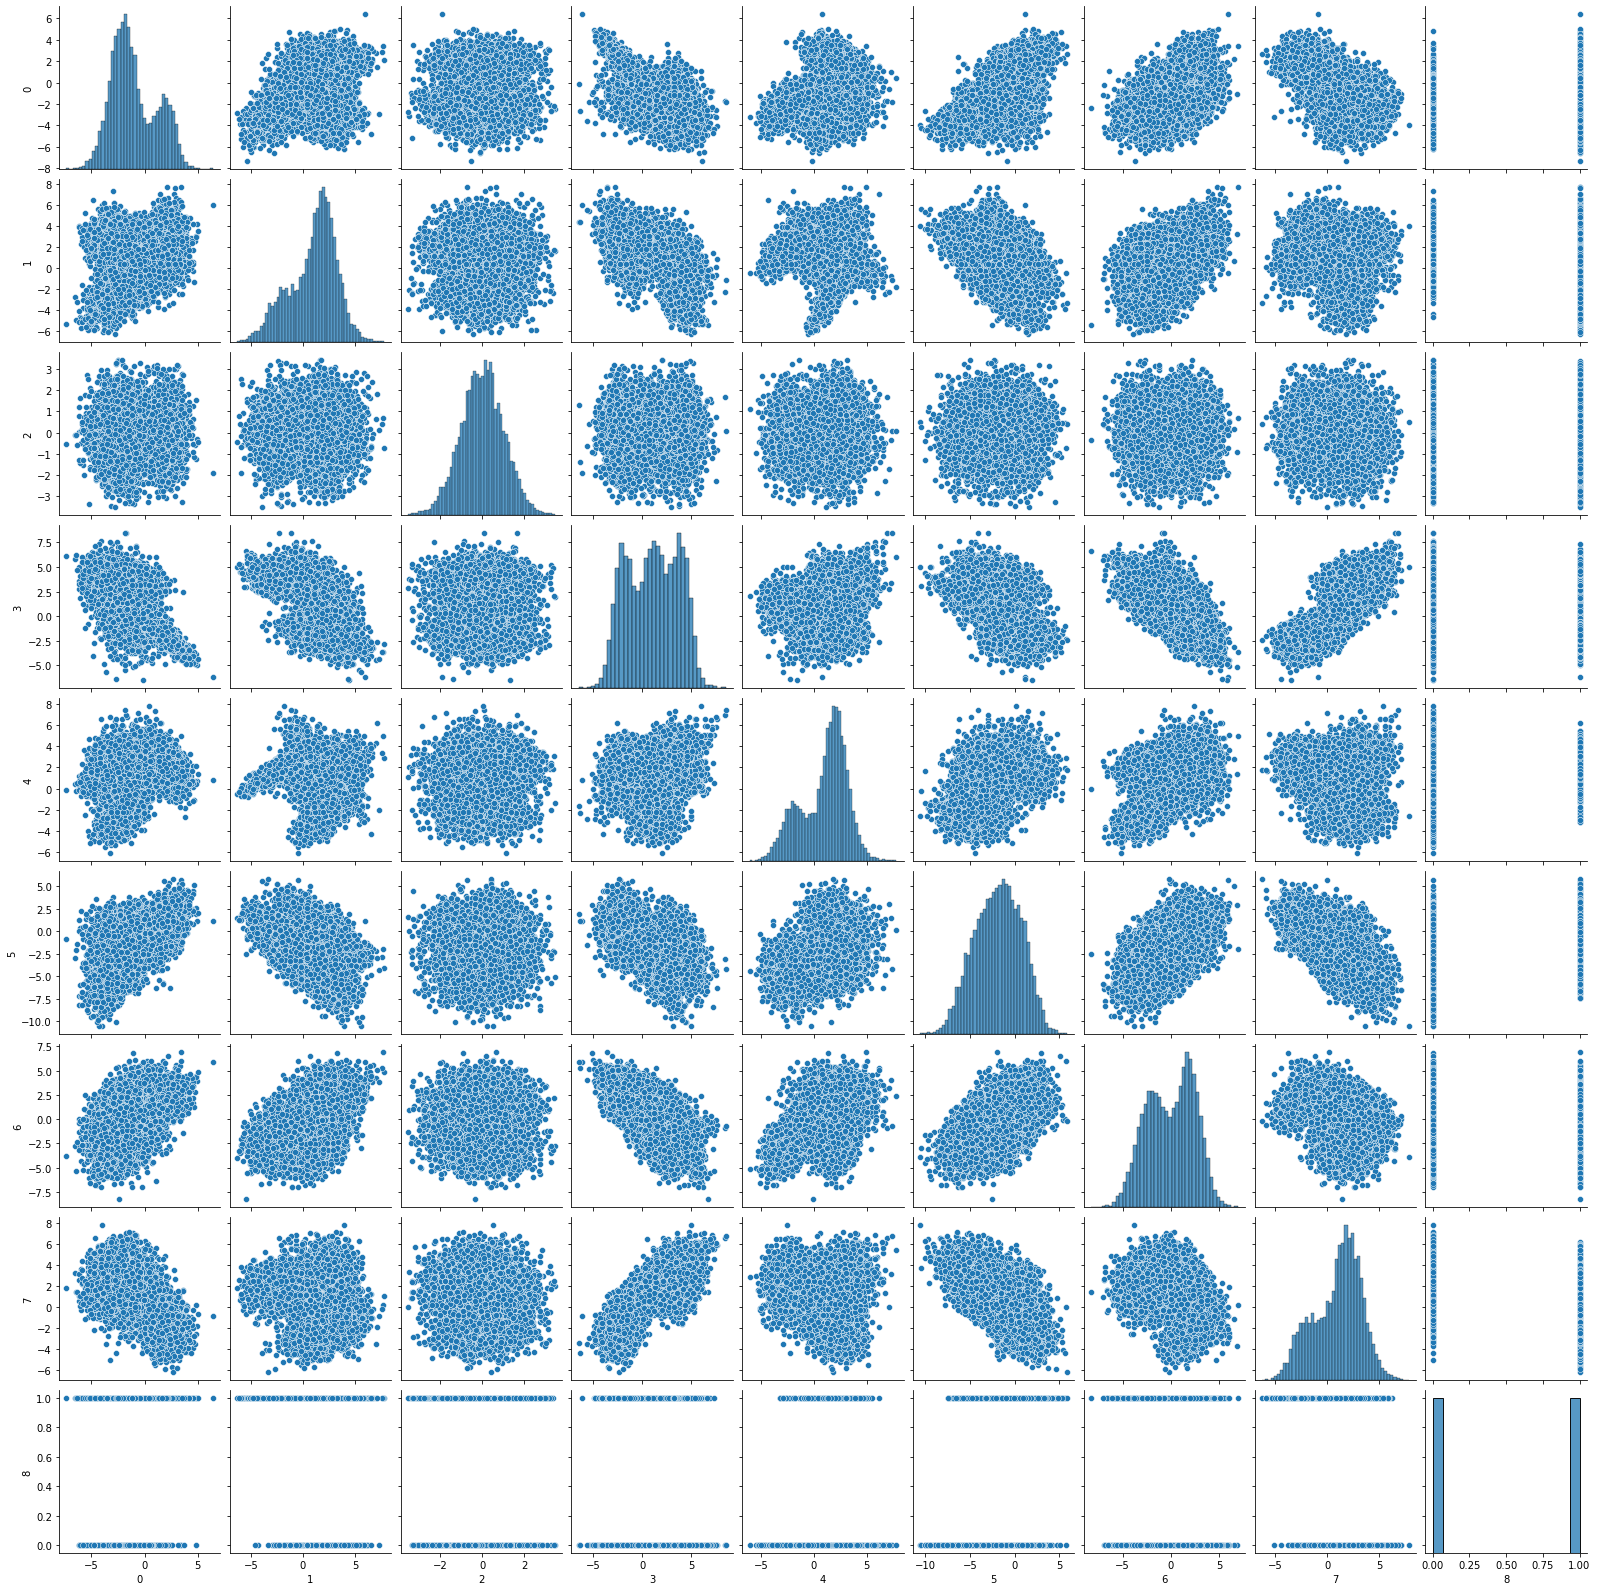

In [7]:
# Visualize data for each feature (pairplot).
sns.pairplot(df)

/Users/merveayer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

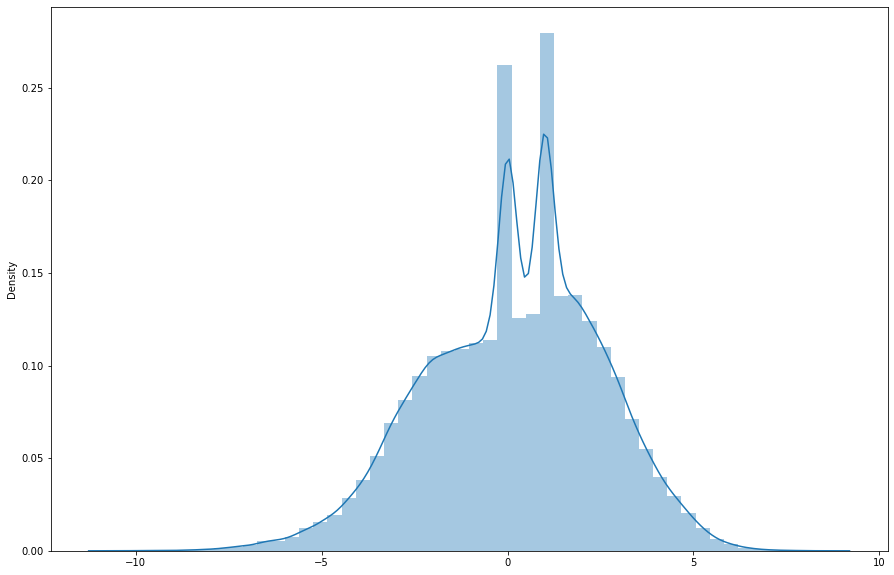

In [8]:
# Visualize data for each feature (distplot).
plt.figure(figsize=(15, 10))
sns.distplot(df)

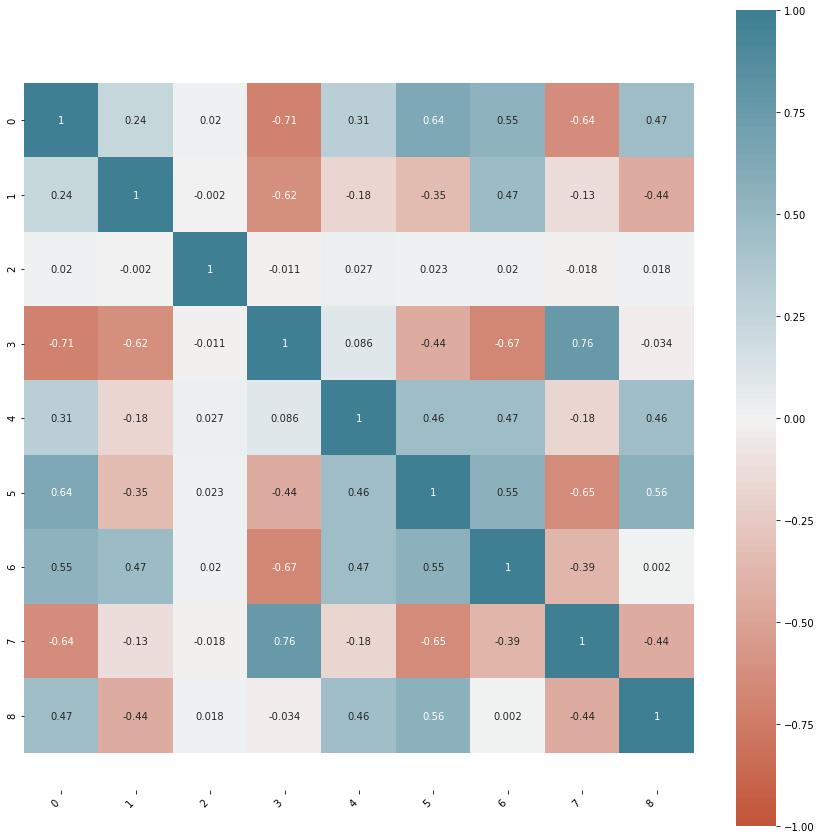

In [9]:
# Draw correlation matrix.
corr = df.corr()

plt.figure(figsize=(15, 15))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, annot = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [10]:
# Handle outliers (you can use IsolationForest, Z-score, IQR)
z = np.abs(stats.zscore(df))
z

array([[0.24934109, 0.21155632, 1.54848575, ..., 0.00566284, 1.15220659,
        0.99880072],
       [1.21562472, 1.62265494, 0.52187207, ..., 1.40338979, 0.51777165,
        1.00120072],
       [0.78712613, 0.16242045, 0.25947611, ..., 0.48387509, 0.35998293,
        0.99880072],
       ...,
       [0.67334555, 1.4827283 , 0.52439513, ..., 0.53475377, 0.55105502,
        1.00120072],
       [0.08336999, 0.15830524, 0.83152777, ..., 0.99626339, 0.9651887 ,
        1.00120072],
       [0.66636667, 0.73903683, 0.68826729, ..., 1.24352619, 1.01322073,
        0.99880072]])

In [11]:
len(np.where(z > 3)[0])

59

In [12]:
outliers = list(set(np.where(z > 3)[0]))
dataset = df.drop(outliers,axis = 0).reset_index(drop = True)
display(dataset)

,0,1,2,3,4,5,6,7,8
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344,0.0
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611,1.0
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524,0.0
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934,0.0
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770,0.0
...,...,...,...,...,...,...,...,...,...
9937,-2.399057,2.275687,-0.345061,0.629983,3.397411,-1.502344,3.098817,0.583324,0.0
9938,-1.487918,2.273560,-1.152804,2.062795,-0.571202,-5.398310,-2.426969,2.455303,0.0
9939,0.425978,4.298317,0.536100,-1.266725,1.370092,-3.187447,1.306534,-0.254036,1.0
9940,-1.182084,0.628536,0.848320,4.571744,3.057226,-4.759462,-2.439117,3.182019,1.0


In [13]:
# Split dataset into train and test set
X, y = dataset.iloc[:,:-1], dataset.iloc[:,-1]
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


In [14]:
# Import Decision Tree, define different hyperparamters and tune the algorithm.
from sklearn.tree import DecisionTreeClassifier

max_depth_values = [1,2,3,4,5]
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth, random_state=42)
    clf.fit(X_train,y_train)
    print("max depth value = ",max_depth,"\nAccuracy of train:",clf.score(X_train,y_train))
    print("Accuracy of test:",clf.score(X_test,y_test))
    print("\n")

max depth value =  1 
Accuracy of train: 0.9637879005604254
Accuracy of test: 0.9654710023466309


max depth value =  2 
Accuracy of train: 0.9637879005604254
Accuracy of test: 0.9654710023466309


max depth value =  3 
Accuracy of train: 0.9637879005604254
Accuracy of test: 0.9654710023466309


max depth value =  4 
Accuracy of train: 0.9637879005604254
Accuracy of test: 0.9654710023466309


max depth value =  5 
Accuracy of train: 0.9637879005604254
Accuracy of test: 0.9654710023466309




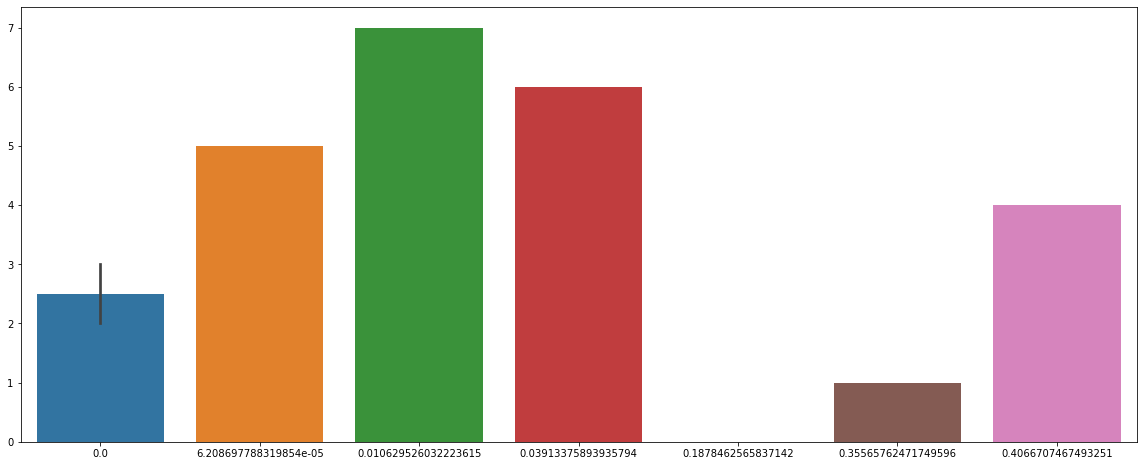

In [15]:
# Visualize feature importances.
plt.figure(figsize=(20, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [16]:
# Calculate accuracy, recall, precision and f1 score.

pred = clf.predict(X_test)
print(classification_report(y_test,pred))
print("\n")
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1527
         1.0       0.98      0.94      0.96      1456

    accuracy                           0.97      2983
   macro avg       0.97      0.96      0.97      2983
weighted avg       0.97      0.97      0.97      2983



Precision = 0.9665900447816028
Recall = 0.9649803986125204
Accuracy = 0.9654710023466309
F1 Score = 0.9654052986531725


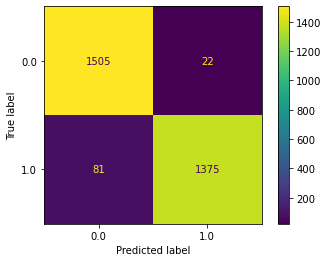

In [17]:
# create confusion matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 

In [35]:
# Import XGBoostClassifier, define different hyperparamters and tune the algorithm.

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)
xgc_model = xgc.fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))


/Users/merveayer/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:26:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Tuned: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 190}
Mean of the cv scores is 0.985774
Train Score 0.999856
Test Score 0.991284
Seconds used for refitting the best model on the train dataset: 0.715956


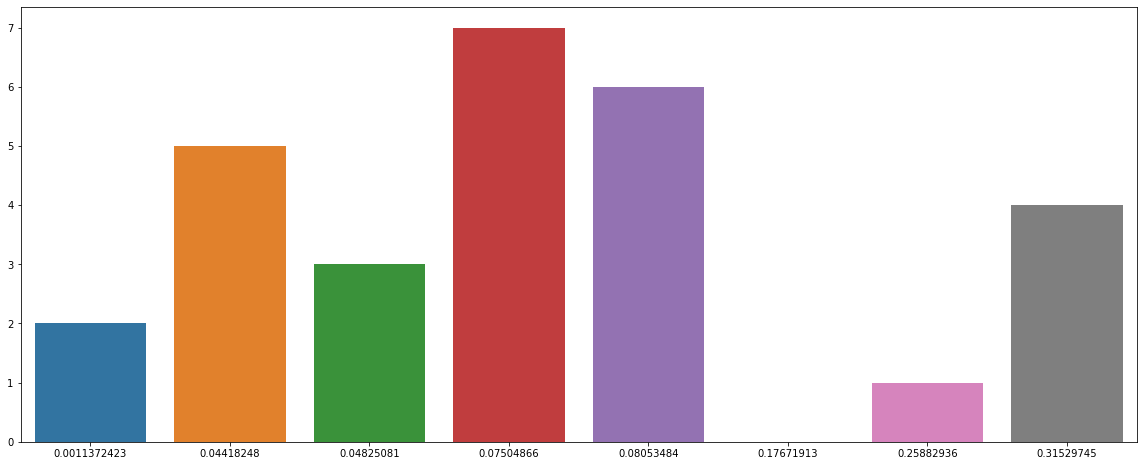

In [32]:
# Visualize feature importances.
plt.figure(figsize=(20, 8))
importance = xgc_model.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [33]:
# Calculate accuracy, recall, precision and f1 score.
pred = xgc_model.predict(X_test)
print(classification_report(y_test,pred))
print("\n")
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1527
         1.0       0.99      0.98      0.99      1456

    accuracy                           0.99      2983
   macro avg       0.99      0.99      0.99      2983
weighted avg       0.99      0.99      0.99      2983



Precision = 0.9860094614088086
Recall = 0.9858323977921227
Accuracy = 0.9859202145491116
F1 Score = 0.9859098254017666


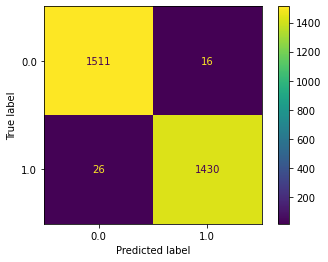

In [34]:
# Create confusion matrix
plot_confusion_matrix(xgc_model, X_test, y_test)  
plt.show() 

# Evaluate your result and select best performing algorithm for our case.
If we compare decision tree algorithm and XGBoost algorithm we can say that XGBoost algorithm performance is more accurate than decision tree algorithm. For our case XGBoost algorithm is the best according to performance.
